## Data import

In [65]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Import the dataset
df = pd.read_csv('model.csv')

In [67]:
# Show the dimensions of the dataset
df.shape

(12000, 23)

In [68]:
df.sample(10)

,id,duration,codec,width,height,bitrate,category,framerate,i,p,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
1307,1308,39.055000,h264,1920,1080,5992818,News & Politics,30.000000,26,1144,...,28416939,0,29256190,h264,3000000,12.00,1280,720,377504,68.368
1633,1634,177.333330,mpeg4,176,144,53707,People & Blogs,12.000000,37,2091,...,1089548,0,1190517,vp8,539000,25.00,1280,720,163024,11.241
8148,8149,452.689000,vp8,320,240,66680,Science & Technology,5.705752,42,2537,...,3566163,0,3773200,vp8,539000,12.00,1920,1080,248092,21.209
10093,10094,130.356670,mpeg4,176,144,54590,News & Politics,12.000000,27,1537,...,825054,0,889537,h264,3000000,12.00,480,360,95468,11.933
2704,2705,67.583336,mpeg4,176,144,51225,People & Blogs,12.000000,15,777,...,385164,0,432749,h264,3000000,24.00,1280,720,311236,42.119
1293,1294,130.356670,mpeg4,176,144,54590,People & Blogs,12.000000,27,1537,...,825054,0,889537,h264,539000,24.00,640,480,132828,12.565
777,778,74.535000,mpeg4,176,144,55305,Gaming,12.000000,15,879,...,491276,0,515272,h264,539000,29.97,1920,1080,632852,54.739
5699,5700,368.320000,vp8,640,480,29096,Gaming,25.021740,74,9134,...,470067,0,1339625,h264,3000000,29.97,1920,1080,633388,32.146
2717,2718,74.535000,mpeg4,176,144,55305,Education,12.000000,15,879,...,491276,0,515272,vp8,5000000,29.97,1920,1080,219464,22.301
5948,5949,222.533340,h264,480,360,500449,Music,30.000000,219,6457,...,11099102,0,13920824,vp8,242000,12.00,1920,1080,217336,19.013


## Exploratory Data Analysis

In [69]:
# Verify if there are some duplicated rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Length: 12000, dtype: bool

In [70]:
# Verify how many NaN are in that column
df.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
category       0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

## Split categorical/continuos variables

In [71]:
# Show the columns'name 
df.columns

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'category',
       'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size',
       'size', 'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime'],
      dtype='object')

In [72]:
# Show categorical and numerical variables
df.dtypes

id               int64
duration       float64
codec           object
width            int64
height           int64
bitrate          int64
category        object
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [73]:
# Add all the categorical variables to df_categorical 
df_categorical=df[['codec', 'category', 'o_codec']]
df_categorical.head()

,codec,category,o_codec
0,vp8,People & Blogs,vp8
1,h264,People & Blogs,flv
2,h264,Sports,h264
3,vp8,Gaming,h264
4,flv,Music,mpeg4


In [74]:
# Add all the numerical variables into df_numerical
df_numerical=df[['id', 'duration', 'width', 'height','bitrate', 'framerate','i','p','b','frames','i_size','p_size','b_size',
                'size','o_bitrate','o_framerate','o_width','o_height','umem','utime']]
df_numerical.head()

,id,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,1,645.84000,320,240,95903,25.032558,138,16008,0,16146,1081321,6660941,0,7742262,109000,29.97,1280,720,218932,15.929
1,2,326.58832,1920,1080,5999648,23.000000,174,7656,0,7830,16603953,228322925,0,244926878,820000,29.97,1920,1080,218932,10.417
2,3,473.00000,320,240,164017,25.000000,198,10924,704,11826,1419320,8047423,0,9697521,242000,24.00,1920,1080,645544,45.327
3,4,448.57500,1280,720,2052426,30.002232,92,13349,0,13441,9132637,105950761,0,115083398,3000000,15.00,1920,1080,655172,102.842
4,5,255.28000,320,240,250276,25.000000,110,6272,0,6382,611474,7374864,0,7986338,820000,25.00,1920,1080,216820,14.937


In [75]:
# Drop b_size
df_numerical=df_numerical.drop(["b_size"], axis=1)

## Categorical data

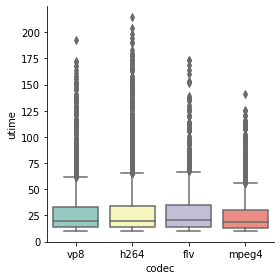

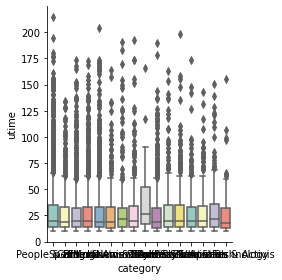

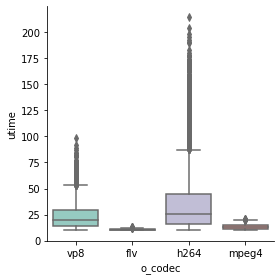

In [76]:
# Show the catplots
for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="utime",
            kind="box", palette="Set3",height=4);
plt.show()

In [77]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,...,category_Nonprofits & Activis,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_h264,o_codec_mpeg4,o_codec_vp8
11995,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
11997,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11998,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023338020C40>,
      dtype=object)

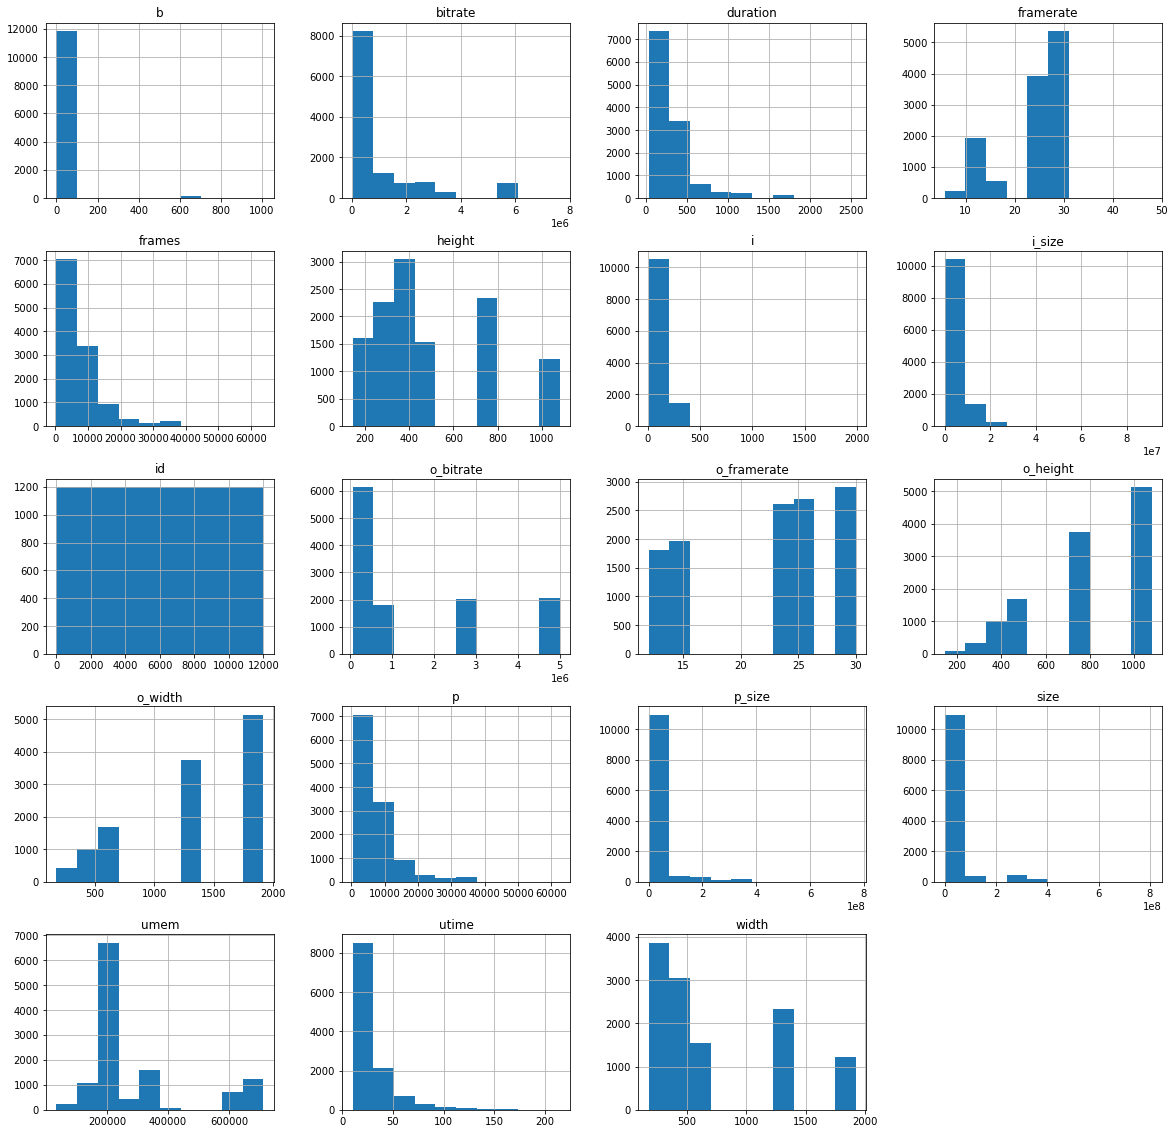

In [78]:
# Plot histogram
df_numerical.hist(figsize=(20,20))

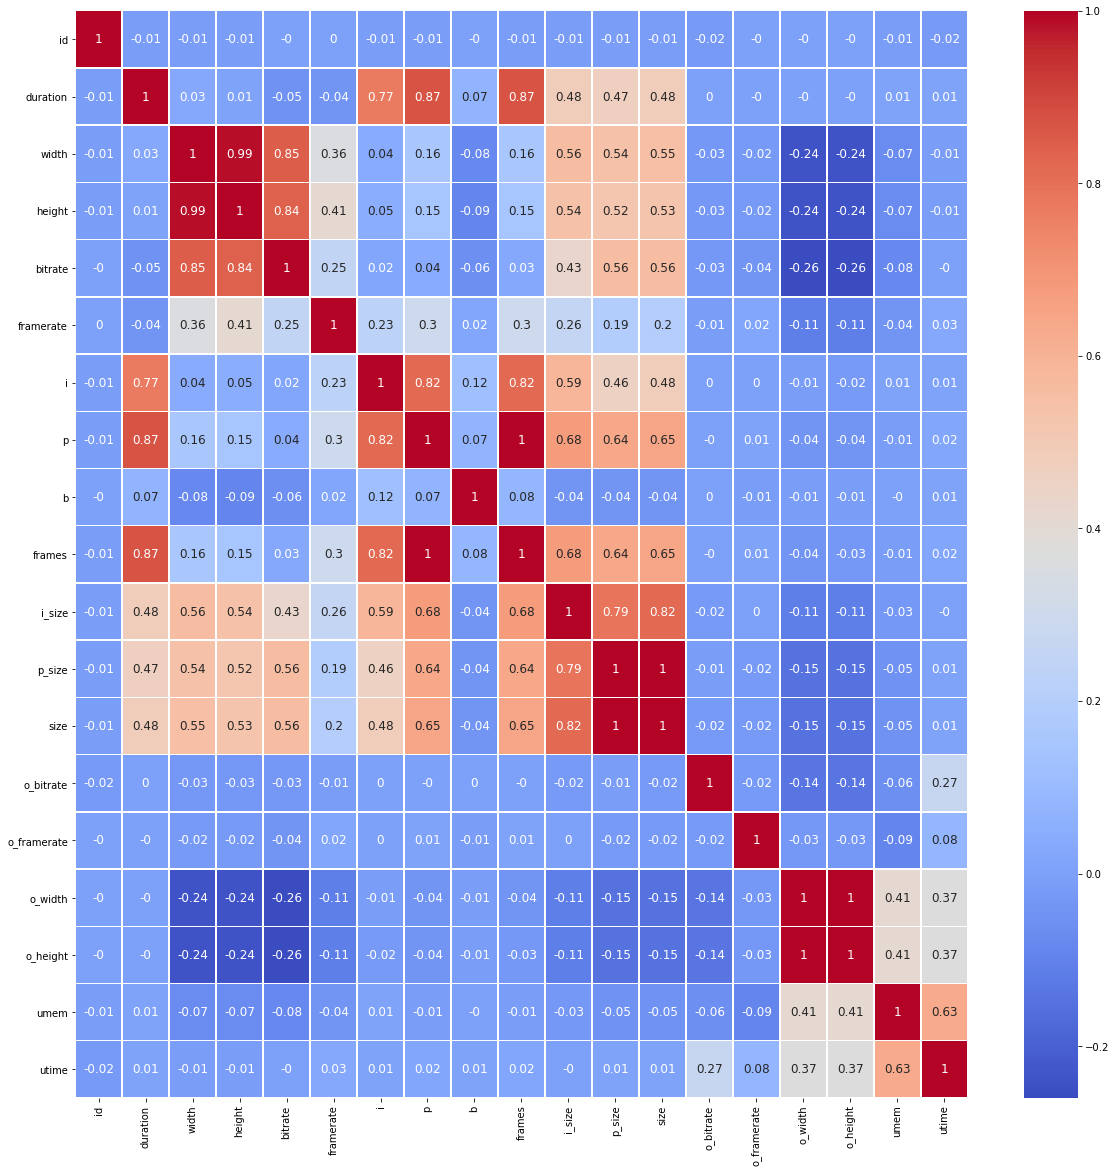

In [79]:
# Visualise the correlation using a heatmap in Seaborn

plt.figure(figsize = (20,20))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

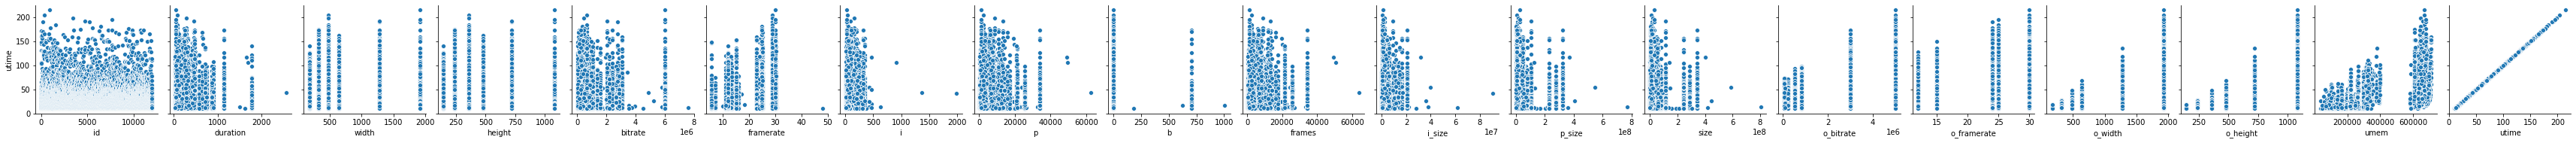

In [80]:
# Visualize the relationship between the features and the response using scatterplots

sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='utime')

In [81]:
# Drop the highly correlated variable
df_numerical=df_numerical.drop(["height","p","p_size","o_height"], axis=1)

## Standardize

In [82]:
# Data standardization using Standard Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,id,duration,width,bitrate,framerate,i,b,frames,i_size,size,o_bitrate,o_framerate,o_width,umem,utime
0,-1.731906,1.316084,-0.761638,-0.616648,0.144284,0.426393,-0.110700,1.434653,-0.455126,-0.390518,-0.821838,1.180610,-0.146451,-0.473726,-0.519115
1,-1.731618,0.149477,2.195893,3.314699,-0.153337,0.855629,-0.110700,0.151185,2.764643,3.141591,-0.432345,1.180610,0.995025,-0.473726,-0.754353
2,-1.731329,0.684493,-0.761638,-0.571290,0.139516,1.141786,9.013614,0.767916,-0.385017,-0.361400,-0.748979,0.250827,0.995025,2.146757,0.735516
3,-1.731040,0.595240,1.012880,0.686215,0.871977,-0.122076,-0.110700,1.017171,1.214911,1.207986,0.761883,-1.150855,0.995025,2.205898,3.190108
4,-1.730752,-0.111097,-0.761638,-0.513849,0.139516,0.092542,-0.110700,-0.072295,-0.552584,-0.386883,-0.432345,0.406570,0.995025,-0.486699,-0.561451


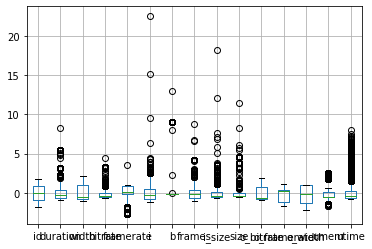

In [83]:
# Boxplot
scaled_df.boxplot()

In [84]:
# Scale variables
X_numerical=scaled_df.iloc[:,:-1]

In [85]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(12000, 21)
(12000, 14)


,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,...,category_Nonprofits & Activis,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_h264,o_codec_mpeg4,o_codec_vp8
11995,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
11997,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11998,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [86]:
# Concatenation between dummies and X_numerical

X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,...,framerate,i,b,frames,i_size,size,o_bitrate,o_framerate,o_width,umem
11995,0,1,0,1,0,0,0,0,0,0,...,-2.496165,-1.099781,-0.110700,-1.004183,-0.672564,-0.500840,1.857504,1.180610,-0.146451,0.174976
11996,1,0,0,0,0,0,0,0,0,0,...,0.725223,-0.706314,-0.110700,-0.684242,-0.551078,-0.402366,-0.432345,-1.150855,0.995025,2.200148
11997,0,0,1,0,0,0,0,1,0,0,...,-1.546929,-0.253232,-0.110700,0.503382,0.119699,0.603441,-0.432345,1.180610,-0.146451,0.193108
11998,1,0,0,0,0,1,0,0,0,0,...,0.139516,1.141786,9.013614,0.767916,-0.385017,-0.361400,-0.748979,0.406570,-0.146451,0.137875
11999,0,0,1,0,0,0,0,0,0,0,...,0.875957,-1.028242,-0.110700,-0.899697,-0.629951,-0.493927,-0.821838,0.250827,0.995025,-0.800706


### Separate Train/Test sets

In [87]:
#Separate X and y (explanatory variables and target variable)
X = X.iloc[:,0:-1] 
y = df.iloc[:,-1] 


# y=df['utime']

In [88]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state= 123) 

print(X_train.shape, X_test.shape)

(8400, 34) (3600, 34)


## Models

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
# Define the gs_regression function 

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    # Summarize the results of your Gridsearch
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, gs.predict(X_train)), metrics.mean_absolute_error(y_test, gs.predict(X_test))) ) 
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, gs.predict(X_train)), metrics.mean_squared_error(y_test, gs.predict(X_test))) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test)))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, gs.predict(X_train)), metrics.r2_score(y_test, gs.predict(X_test))) ) 


## Random Forest Regression

In [91]:
# Define the regressor and the parameters grid 

from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,200], "criterion": ['mse'], 
              "min_samples_leaf": [3,10,30], "random_state" : [42]}
gs = GridSearchCV(regressor, parameters,cv=3,scoring ='neg_mean_absolute_error') 
gs = gs.fit(X_train,y_train)

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3.391924 using {'criterion': 'mse', 'min_samples_leaf': 3, 'n_estimators': 200, 'random_state': 42}

MAE  train 1.593    test 02.885
MSE  train 8.440 test 25.054
RMSE train 2.905   test 5.005
r2   train 0.985     test 0.955


In [92]:
# In order to see if the mean value is near to zero we can use the funcion describe
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()

count    8400.000000
mean        0.020522
std         2.905288
min       -44.086880
25%        -0.709990
50%         0.133644
75%         0.871433
max        28.084450
Name: utime, dtype: float64

## Distribution of the errors

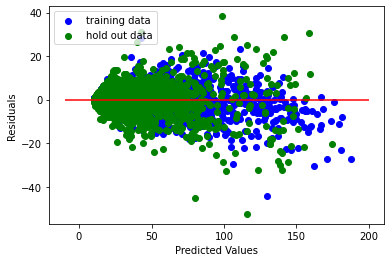

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=200, color="r")
plt.show()

## Normality Test

In [94]:
# Scale data, because we want to see if the distribution is normal
error_train = np.array(gs.predict(X_train)-y_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()

In [95]:
scaled_error_train[1:5]

array([ 0.06232131, -1.34375057,  0.05900836,  0.50075552])

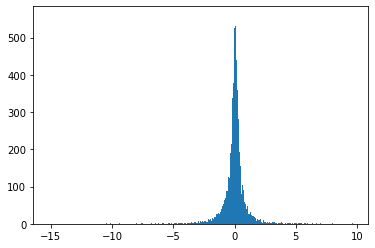

In [96]:
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

## Methods to test the normal distribution of the errors 

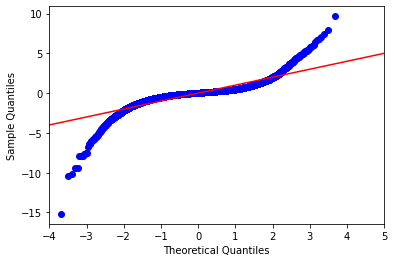

In [97]:
# qq plot

import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(scaled_error_train,line='45')
plt.xlim([-4,5])
plt.show()

In [98]:
# Kolmogorov-Smirnov Test

from scipy import stats
stats.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.15916337762640462, pvalue=2.3525577874715693e-186)

In [99]:
# D’Agostino Test

stats.normaltest(scaled_error_train)

NormaltestResult(statistic=3354.1180548392385, pvalue=0.0)

# Making the predictions

In [100]:
df2 = pd.read_csv('predictions.csv')

In [101]:
# With the same order that we have considered before

df2_categorical=df2[['codec', 'category', 'o_codec']]
df2_numerical=df2[['id', 'duration', 'width', 'height','bitrate', 'framerate','i','p','b','frames','i_size','p_size','b_size',
                'size','o_bitrate','o_framerate','o_width','o_height','umem']]

df2_numerical=df2_numerical.drop(['b_size'],axis=1)
dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 
df2_numerical=df2_numerical.drop(['height','p','p_size','o_height'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df2_numerical)
scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

X2_numerical=scaled_df2.iloc[:,:-1]
X2=pd.concat([dummies2,X2_numerical], axis = 1)


In [102]:

model = RandomForestRegressor(n_estimators=200, criterion="mse", min_samples_leaf=3)
model.fit(X,y)
y_predictions=model.predict(X2)

In [103]:
# Prediction in the new data

y_predictions


array([13.40193698, 13.6545278 , 12.97013256, ..., 24.89176442,
       21.21168593, 14.54167308])

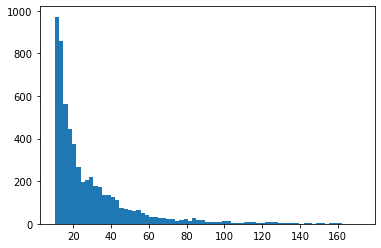

,0
count,5836.000000
mean,28.242634
std,22.306855
min,10.277270
25%,13.653463
50%,19.791638
75%,34.220341
max,171.414090


In [104]:
plt.hist(y_predictions,bins='auto')
plt.show()
pd.DataFrame(y_predictions).describe()

In [108]:
predictions = pd.DataFrame(y_predictions, columns =['target'])
predictions.to_csv('10607888.csv', index=False, float_format='%.2f')

In [106]:
#np.savetxt("971588.csv", y_predictions.astype(float), delimiter=",", fmt='%.2f', header = 'target')